<a href="https://colab.research.google.com/github/Dorra2021/Analyse_sentiment/blob/main/Squid_Game_Final_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importation

In [11]:
!pip install dateparser
!pip install scattertext


##Drive

In [12]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import dateparser
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#1) import des données
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/NLP/')
df = pd.read_csv('allocine_squidgame.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Nettoyage

In [14]:
df.head()

,Note,Description,Date,nombre_good,nombre_follow,key
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10,Suivre son activité,0
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12,Suivre son activité,1
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21,Suivre son activité,2
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10,Suivre son activité,3
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9,Suivre son activité,4


In [15]:
df.tail()

,Note,Description,Date,nombre_good,nombre_follow,key
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,Publiée le 24 octobre 2021,0\n\n\n1,Suivre son activité,10
337,"4,5",Une série qui fait réfléchir.La série met en s...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,11
338,"4,0",très bonne série nous tiens en haleine du débu...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,12
339,"3,5","Bonne série,je trouve que c'est une version so...",Publiée le 21 octobre 2021,0\n\n\n0,Suivre son activité,13
340,"4,5","Squid Game, encore une série Coréenne exceptio...",Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,14


In [16]:
df.shape

(341, 6)

In [17]:
df.describe()

,key
count,341.000000
mean,6.920821
std,4.289132
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,14.000000


In [18]:
df['nombre_good'].value_counts()

0\n\n\n0      121
1\n\n\n0       44
0\n\n\n1       27
2\n\n\n0       24
1\n\n\n2       12
             ... 
8\n\n\n11       1
9\n\n\n12       1
5\n\n\n3        1
24\n\n\n12      1
0\n\n \n0       1
Name: nombre_good, Length: 68, dtype: int64

In [19]:
df.tail()

,Note,Description,Date,nombre_good,nombre_follow,key
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,Publiée le 24 octobre 2021,0\n\n\n1,Suivre son activité,10
337,"4,5",Une série qui fait réfléchir.La série met en s...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,11
338,"4,0",très bonne série nous tiens en haleine du débu...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,12
339,"3,5","Bonne série,je trouve que c'est une version so...",Publiée le 21 octobre 2021,0\n\n\n0,Suivre son activité,13
340,"4,5","Squid Game, encore une série Coréenne exceptio...",Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,14


In [20]:
# On clean la date avec un regex pour sortir le "Publiée le" et garder seulement la date dans une nouvelle colonne 'Date_clean'
df['Date_clean'] = df['Date'].str.extract('Publiée le (\d.* .* \d.*)')

In [21]:
df['Date_clean']

0         2 octobre 2021
1         1 octobre 2021
2      22 septembre 2021
3         5 octobre 2021
4      25 septembre 2021
             ...        
336      24 octobre 2021
337      26 octobre 2021
338      26 octobre 2021
339      21 octobre 2021
340      26 octobre 2021
Name: Date_clean, Length: 341, dtype: object

In [22]:
df.head()

,Note,Description,Date,nombre_good,nombre_follow,key,Date_clean
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10,Suivre son activité,0,2 octobre 2021
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12,Suivre son activité,1,1 octobre 2021
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21,Suivre son activité,2,22 septembre 2021
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10,Suivre son activité,3,5 octobre 2021
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9,Suivre son activité,4,25 septembre 2021


In [23]:
type(df['Date_clean'])

pandas.core.series.Series

In [24]:
# On utilise le parser pour renvoyer un datetime dans une nouvelle colonne 'datetime'
df['datetime'] = df.apply(lambda row :dateparser.parse(row['Date_clean']) , axis = 1)

In [25]:
# On drop les colonnes dates inutiles
df.drop('Date',inplace=True,axis=1)
df.drop('Date_clean',inplace=True,axis=1)

In [26]:
df['good'] = df.nombre_good.apply(lambda x: re.split("\s+", x)[0])

In [27]:
df['good']

0      22
1      24
2      20
3       9
4       7
       ..
336     0
337     0
338     0
339     0
340     0
Name: good, Length: 341, dtype: object

In [28]:
df['bad'] = df.nombre_good.apply(lambda x: re.split("\s+", x)[1])

In [29]:
df.drop('nombre_good', axis=1, inplace=True)

In [30]:
df.drop("nombre_follow", axis=1, inplace=True)

In [31]:
df['Note'] = df['Note'].apply(lambda x: x.replace(',', '.')) #on remplace , par .

In [32]:
df['Note'] = df['Note'].astype('float64') #convertir la colonne note en float

##Nombre de mots, tokenisation, lemmatisation

In [33]:
df['Description']

0      On s'attendait à une fin plus élaborée, claire...
1      Encore une série très sur-côtée ! Tout est pré...
2      Pas fan des séries coréennes en général. Je do...
3      Disons le tout de suite, je suis fan depuis 30...
4      Visuellement recherché, très ludique, rythmé e...
                             ...                        
336    Vraiment une des meilleures séries que j'ai vu...
337    Une série qui fait réfléchir.La série met en s...
338    très bonne série nous tiens en haleine du débu...
339    Bonne série,je trouve que c'est une version so...
340    Squid Game, encore une série Coréenne exceptio...
Name: Description, Length: 341, dtype: object

In [34]:
df['nb_mot'] = df['Description'].apply(lambda x: len(x.split())) # Calcul d'une variable contenant le nombre de mots de chaque commentaire
df['nb_phrase'] =df['Description'].apply(lambda x: len(x.split('. ')))
df['nb_caractere'] = df['Description'].apply(lambda x: len(x) - len(x.split())- len(x.split('.')))

df['description_clean'] = df['Description'].copy()
df['description_clean'] = df['description_clean'].map(lambda x : re.sub('[,\.!?()"]', '', x)) 
df['description_clean'] = df['description_clean'].map(lambda x : re.sub('\d', '', x))  #supprimer les nombres de [0-9]

Méthode 1: TOKENISATION

In [35]:
df['tokens'] = df['description_clean'].apply(lambda x: word_tokenize(x))

In [36]:
df['tokens']

0      [On, s'attendait, à, une, fin, plus, élaborée,...
1      [Encore, une, série, très, sur-côtée, Tout, es...
2      [Pas, fan, des, séries, coréennes, en, général...
3      [Disons, le, tout, de, suite, je, suis, fan, d...
4      [Visuellement, recherché, très, ludique, rythm...
                             ...                        
336    [Vraiment, une, des, meilleures, séries, que, ...
337    [Une, série, qui, fait, réfléchirLa, série, me...
338    [très, bonne, série, nous, tiens, en, haleine,...
339    [Bonne, sérieje, trouve, que, c'est, une, vers...
340    [Squid, Game, encore, une, série, Coréenne, ex...
Name: tokens, Length: 341, dtype: object

Méthode 2: TOKENISATION

In [37]:
nltk.download('punkt') # nécessaire pour la tokenisation #la tokenisation: mettre les phrases dans une liste de mots

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
def tokenisation(commentaire):
  comm_tokenized = nltk.word_tokenize(commentaire)
  return(comm_tokenized)

In [39]:
df['Tokens_2'] = df["Description"].apply(lambda comm : tokenisation(comm))

In [40]:
df[["Description", "Tokens_2"]].head() #resultat des mots tokénisés et non pas comme avant 

,Description,Tokens_2
0,"On s'attendait à une fin plus élaborée, claire...","[On, s'attendait, à, une, fin, plus, élaborée,..."
1,Encore une série très sur-côtée ! Tout est pré...,"[Encore, une, série, très, sur-côtée, !, Tout,..."
2,Pas fan des séries coréennes en général. Je do...,"[Pas, fan, des, séries, coréennes, en, général..."
3,"Disons le tout de suite, je suis fan depuis 30...","[Disons, le, tout, de, suite, ,, je, suis, fan..."
4,"Visuellement recherché, très ludique, rythmé e...","[Visuellement, recherché, ,, très, ludique, ,,..."


Suppression des stops words

In [41]:
snow_stemmer = SnowballStemmer(language='french')

french_stopwords = stopwords.words('french')
stop_words_fr_without_negation = [i for i in french_stopwords if i not in ['ne', 'pas', 'mais']]

df['stop_words'] = df['tokens'].apply(lambda x:[item for item in x if item not in stop_words_fr_without_negation])

df['stemm'] = df['stop_words'].apply(lambda x:[snow_stemmer.stem(item) for item in x])

In [42]:
df.head(10)
df_class = df.copy() # copie pour travailler avec le Naive Bayes sur les notes 

In [43]:
df['Note']

0      3.0
1      2.5
2      4.5
3      4.5
4      4.0
      ... 
336    5.0
337    4.5
338    4.0
339    3.5
340    4.5
Name: Note, Length: 341, dtype: float64

In [44]:
#definition de la colonne 'sentiment' comme 'la note' (on aura un résultat binaire)
df['Sentiment'] = df['Note'].apply(lambda x: 0 if x<4 else 1) 

In [45]:
df_y = df['Sentiment']

In [46]:
df.drop('Sentiment', axis=1, inplace = True) #on a supprimé la colonne sentiment vu qu'on va l'utiliser pour le classement 

In [47]:
df.drop('Note', axis=1, inplace = True) #on a la colonne sentiment pour la classification

In [48]:
df.head()

,Description,key,datetime,good,bad,nb_mot,nb_phrase,nb_caractere,description_clean,tokens,Tokens_2,stop_words,stemm
0,"On s'attendait à une fin plus élaborée, claire...",0,2021-10-02,22,10,562,14,2665,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, à, une, fin, plus, élaborée,...","[On, s'attendait, à, une, fin, plus, élaborée,...","[On, s'attendait, fin, plus, élaborée, clairem...","[on, s'attend, fin, plus, élabor, clair, de, d..."
1,Encore une série très sur-côtée ! Tout est pré...,1,2021-10-01,24,12,89,3,402,Encore une série très sur-côtée Tout est prév...,"[Encore, une, série, très, sur-côtée, Tout, es...","[Encore, une, série, très, sur-côtée, !, Tout,...","[Encore, série, très, sur-côtée, Tout, prévisi...","[encor, ser, tres, sur-côt, tout, prévisibl, p..."
2,Pas fan des séries coréennes en général. Je do...,2,2021-09-22,20,21,30,4,151,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, des, séries, coréennes, en, général...","[Pas, fan, des, séries, coréennes, en, général...","[Pas, fan, séries, coréennes, général, Je, doi...","[pas, fan, ser, coréen, général, je, dois, avo..."
3,"Disons le tout de suite, je suis fan depuis 30...",3,2021-10-05,9,10,136,6,656,Disons le tout de suite je suis fan depuis an...,"[Disons, le, tout, de, suite, je, suis, fan, d...","[Disons, le, tout, de, suite, ,, je, suis, fan...","[Disons, tout, suite, fan, depuis, ans, produc...","[dison, tout, suit, fan, depuis, an, product, ..."
4,"Visuellement recherché, très ludique, rythmé e...",4,2021-09-25,7,9,30,2,167,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm...","[Visuellement, recherché, ,, très, ludique, ,,...","[Visuellement, recherché, très, ludique, rythm...","[visuel, recherch, tres, ludiqu, rythm, galer,..."


**Train/Test SPLIT**

doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['stemm'],df_y, test_size=0.3, random_state=27) 
#df_y=df['sentiment]
#l'algo de bayes est un algorithme d'apprentissage supervisé, on a donc:
# y sentiment (on les a classé en 0 et 1)
# x est l'ensemble des phrases tokenisées et après stemmig

In [86]:
y_train.value_counts()

1    124
0    114
Name: Sentiment, dtype: int64

In [87]:
y_test.value_counts()

1    55
0    48
Name: Sentiment, dtype: int64

In [88]:
X_test

195    [pas, déplais, regard, mais, d'énorm, ficel, s...
236    [j'ai, pass, bon, moment, dev, squid, gam, déc...
21     [décor, imag, sublim, melang, battl, royal, se...
325    [on, a, toujour, droit, sempiternel, pseudo-ex...
216    [malgr, l'engou, international, cet, ser, ne, ...
                             ...                        
29     [vrai, fan, film, cor, sud, excellent, thrille...
260    [ok, direct, artist, reuss, jeux, parfois, hal...
252    [excellent, ser, mérit, larg, battag, médiat, ...
208    [général, ne, absolu, pas, ser, survival, mais...
226    [👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍...
Name: stemm, Length: 103, dtype: object

In [89]:
X_train

90     [excellent, personnag, incroi, ains, jeux, sus...
143    [tres, inspir, battl, royal, donc, pas, vrai, ...
80     [sort, prix, dang, version, encor, plus, proch...
145    [la, ser, a, fait, l'effet, d'un, bomb, mais, ...
277              [plutôt, symp, j'ai, hât, voir, saison]
                             ...                        
312    [une, ser, fait, pass, temp, la, chut, plus, m...
31     [franch, tres, surpr, cet, ser, just, incroi, ...
328    [la, ser, regard, bien, univer, hung, gam, jeu...
184    [cet, ser, excellent, est-ce, chef, d'œuvr, ma...
19     [excellent, ser, plein, rebond, personnag, int...
Name: stemm, Length: 238, dtype: object

In [53]:
y_train

90     1
143    0
80     1
145    0
277    0
      ..
312    0
31     1
328    0
184    1
19     1
Name: Sentiment, Length: 238, dtype: int64

**TF-IDF**

doc: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tf%20idf#sklearn.feature_extraction.text.TfidfVectorizer 

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform([" ".join(words) for words in X_train])
labels_X_tfidf=vectorizer.get_feature_names_out()

X_test_tfidf = vectorizer.transform([" ".join(words) for words in X_test])

In [91]:
X_train_tfidf

<238x2961 sparse matrix of type '<class 'numpy.float64'>'
	with 12390 stored elements in Compressed Sparse Row format>

In [92]:
labels_X_tfidf

array(['abandon', 'abattr', 'abim', ..., 'œil', 'œuvr', 'œuvresc'],
      dtype=object)

In [93]:
X_train_tfidf.shape

(238, 2961)

In [95]:
X_test_tfidf.shape

(103, 2961)

In [96]:
df_tidf_train = pd.DataFrame(data=X_train_tfidf.toarray(), columns=labels_X_tfidf)  #print la matrice de tf-idf
#nb de transformer X_train_tfidf en array

In [97]:
df_tidf_train.tail()

,abandon,abattr,abim,abord,about,abri,abscon,absenc,absolu,absten,...,évident,évit,évolu,êre,êtr,être,île,œil,œuvr,œuvresc
233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.104753,0.0,0.0,0.000000,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.090519,0.0,0.0,0.000000,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.091514,0.000000,0.0,0.0,0.332624,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [98]:
df_tidf_train['sentiment'] = y_train  #les notes qui sont classées en 0 et 1 

In [99]:
df_best_word = df_tidf_train.groupby(['sentiment']).sum() #on groupe par 'sentiment' 

In [100]:
df_best_word

,abandon,abattr,abim,abord,about,abri,abscon,absenc,absolu,absten,...,évident,évit,évolu,êre,êtr,être,île,œil,œuvr,œuvresc
sentiment,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.101181,0.000000,0.301431,0.036682,0.036682,0.039448,0.000000,0.298633,0.0,...,0.333025,0.369547,0.148366,0.0,0.906787,1.193387,0.146266,0.033198,0.275670,0.0
1.0,0.117309,0.000000,0.179733,0.248846,0.000000,0.000000,0.000000,0.166631,0.352773,0.0,...,0.209337,0.074518,0.078730,0.0,0.561739,0.657278,0.106085,0.170247,0.589178,0.0


In [63]:
df_best_word_transposed = df_best_word.T

In [64]:
df_best_word_transposed.head()

sentiment,0.0,1.0
abandon,0.000000,0.117309
abattr,0.101181,0.000000
abim,0.000000,0.179733
abord,0.301431,0.248846
about,0.036682,0.000000


In [65]:
df_best_word_transposed.describe()

sentiment,0.0,1.0
count,2961.000000,2961.000000
mean,0.173746,0.187096
std,0.336444,0.394440
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.065874,0.081791
75%,0.209765,0.221598
max,5.240282,6.031960


In [66]:
word_neg = df_best_word_transposed.iloc[:,0].sort_values(ascending=False).head(100) #les mots qui sont classés 0 sont des commentaires négatifs

In [67]:
word_pos = df_best_word_transposed.iloc[:,1].sort_values(ascending=False).head(100) #les mots qui sont classés 1 sont des commentaires positifs

In [68]:
word_tri = [word for word in word_neg.index if word not in word_pos.index]

In [ ]:
word_tri

In [70]:
X_test.head()

195    [pas, déplais, regard, mais, d'énorm, ficel, s...
236    [j'ai, pass, bon, moment, dev, squid, gam, déc...
21     [décor, imag, sublim, melang, battl, royal, se...
325    [on, a, toujour, droit, sempiternel, pseudo-ex...
216    [malgr, l'engou, international, cet, ser, ne, ...
Name: stemm, dtype: object

In [71]:
y_test_predict = X_test.apply(lambda x: 0 if any(e in x for e in word_tri) else 1)  # 

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_predict)

array([[42,  6],
       [44, 11]])

<function matplotlib.pyplot.show>

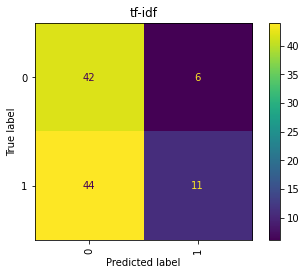

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_test_predict)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('tf-idf')
plt.show

In [74]:
metrics.accuracy_score(y_test, y_test_predict) #clacul de l'accuracy 
#y_tue, y_predict

0.5145631067961165

accuracy=0,51
on constate que notre modèle n'est pas fou, nous nous sommes pas loin de la proba similaire à un lancer d'une pièce²

##CountVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html 

In [101]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df['stemm'],df_y, test_size=0.3, random_state=27)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train2_cv = vectorizer.fit_transform([" ".join(words) for words in X_train2])
X2_test_cv = vectorizer.transform([" ".join(words) for words in X_test2])
vectorizer.get_feature_names_out()

array(['abandon', 'abattr', 'abim', ..., 'œil', 'œuvr', 'œuvresc'],
      dtype=object)

##BernouilliNB
doc: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [78]:
clfb = BernoulliNB()
clfb.fit(X_train2_cv, y_train2)
print(clfb.predict(X2_test_cv))

[1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1]


In [79]:
ypred = clfb.predict(X2_test_cv)

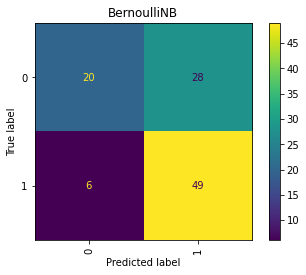

In [80]:
cm = confusion_matrix(y_test2, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('BernoulliNB')
plt.show()

In [81]:
metrics.accuracy_score(y_test2, ypred)

0.6699029126213593

##MultinomialNB
doc: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


In [103]:
 from sklearn.naive_bayes import MultinomialNB

In [104]:
clf = MultinomialNB()
clf.fit(X_train2_cv, y_train2)
MultinomialNB()
print(clf.predict(X2_test_cv))

[0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1]


In [107]:
ypred_m=clf.predict(X2_test_cv)

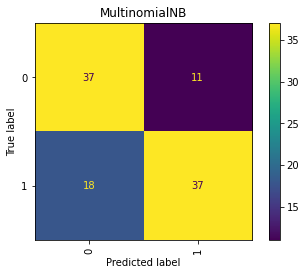

In [108]:
cm = confusion_matrix(y_test2, ypred_m)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('MultinomialNB')
plt.show()

In [110]:
metrics.accuracy_score(y_test2, ypred_m)

0.7184466019417476

on a une accuracy meilleur, ce modèle se trompe moins sur les FN et FP

##GaussianNB

doc: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html 

In [124]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train2_cv.toarray(), y_train2)
GaussianNB()
ppp=clf.predict(X2_test_cv.toarray())

In [ ]:
y_pred()